In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [2]:
company = pd.read_csv("companies.csv")
company

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN


In [3]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [4]:
company.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [5]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## A. Data Cleaning
    1. Delete irrelevant & redundant information
    2. Remove noise or unreliable data (missing values and outliers)
    
### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
       'created_at', 'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
        'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.
     
### 2. Remove noise or unreliable data (missing values and outliers)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
     b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.
     c. Delete contradictory (mutually opposed or inconsistent data).

#### 1.a. Delete 'region','city' as they provide too much of granularity.    

In [6]:
#Type your code here!
company.drop(['region','city','state_code'],axis=1,inplace=True)

In [7]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [8]:
#Type your code here!
company.drop(['id','Unnamed: 0.1','entity_type','entity_id','parent_id','created_by','created_at','updated_at'],axis=1,inplace=True)

In [9]:
company.head()

,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,...,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,...,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [10]:
#Type your code here!
company.drop(['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'], axis=1, inplace=True)

In [11]:
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.d. Delete duplicate values if found any.

In [12]:
# Delete duplicate values if found any.
#Type your code here!
company.drop_duplicates()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415,NaN
196549,public_relations,operating,2007-11-01,NaN,USA,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329,NaN
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091,NaN
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,NaN


In [13]:
# Since, there are duplicate values in the dataset let's see how of duplicate values are present.
#Type your code here!
company.duplicated().sum()

87089

In [14]:
# Let's delete all the duplicate values
#Type your code here!
company.drop_duplicates(inplace=True)

In [15]:
# check if any left
#Type your code here!
company.duplicated().sum()

0

#### 1.e. Delete those which has more than 98% of null values.

In [16]:
company

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415,NaN
196549,public_relations,operating,2007-11-01,NaN,USA,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329,NaN
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091,NaN
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,NaN


In [17]:
# # Since we can see only nan values so et's check how much of ros has nan values.
#Type your code here!
company.isna().sum()

category_code           12230
status                      0
founded_at              26913
closed_at              106845
country_code            24870
first_investment_at    107217
last_investment_at     107217
investment_rounds      107213
first_funding_at        77992
last_funding_at         77992
funding_rounds          77793
funding_total_usd       81602
first_milestone_at      53353
last_milestone_at       53353
milestones              53353
relationships           34403
lat                     28363
lng                     28363
ROI                    108738
dtype: int64

In [18]:
company.isna().any(axis = 1).sum()

109464

In [19]:
company.isnull().sum()

category_code           12230
status                      0
founded_at              26913
closed_at              106845
country_code            24870
first_investment_at    107217
last_investment_at     107217
investment_rounds      107213
first_funding_at        77992
last_funding_at         77992
funding_rounds          77793
funding_total_usd       81602
first_milestone_at      53353
last_milestone_at       53353
milestones              53353
relationships           34403
lat                     28363
lng                     28363
ROI                    108738
dtype: int64

In [20]:
col_percent = pd.DataFrame(company.isnull().sum() * 100 / len(company))
col_percent

,0
category_code,11.172623
status,0.000000
founded_at,24.586165
closed_at,97.607433
country_code,22.719798
first_investment_at,97.947270
last_investment_at,97.947270
investment_rounds,97.943616
first_funding_at,71.248995
last_funding_at,71.248995


In [21]:
# # Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
#Type your code here!
for col in col_percent.index:
  if col_percent.loc[col,0]>97.9:
    company.drop(col, axis=1, inplace=True)

In [22]:
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


#### 2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [23]:
#Type your code here!
company = company[(company.status.notnull()) & (company.country_code.notnull()) & (company.founded_at.notnull())]

In [24]:
#Type your code here!
company.isnull().any(axis=1).sum()

65259

In [25]:
#Type your code here!
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,NaN,NaN,2008-08-22,2008-08-22,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [26]:
# Since we can see only nan values so et's check how much of rows has nan values.
#Type your code here!
company.isna().sum().sum()

349371

In [27]:
#Type your code here!

In [28]:
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,NaN,NaN,2008-08-22,2008-08-22,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


#### 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

In [29]:
#Type your code here!
company.describe()

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
count,23333.000000,2.086500e+04,36318.000000,49757.000000,63435.000000,63435.000000
mean,1.794968,1.569812e+07,1.411008,4.434974,37.351310,-51.080708
std,1.302833,6.944184e+07,0.734073,13.133531,15.740159,70.635115
min,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.485278
25%,1.000000,5.175600e+05,1.000000,1.000000,34.052234,-112.074037
50%,1.000000,2.725875e+06,1.000000,2.000000,39.739236,-76.305514
75%,2.000000,1.200000e+07,2.000000,4.000000,45.384008,0.486064
max,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.165130


<AxesSubplot:xlabel='funding_total_usd'>

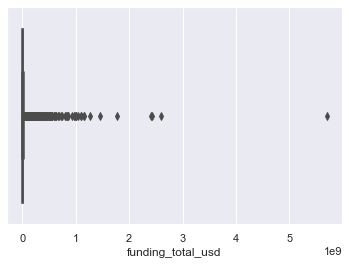

In [30]:
#Type your code here!
sns.boxplot(company['funding_total_usd'])

In [31]:
np.where(company['funding_total_usd'] > 2.1e9)

(array([ 2388, 30230, 50553, 56888], dtype=int64),)

<AxesSubplot:xlabel='funding_rounds'>

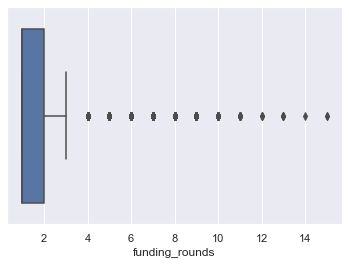

In [32]:
sns.boxplot(company['funding_rounds'])

In [33]:
np.where(company['funding_rounds'] > 4)

(array([    7,    40,    79, ..., 65759, 65804, 65884], dtype=int64),)

### Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. Compare the plots after trimming 


#### 2.b.1. Find the IQR

In [34]:
# For funding_total_usd
#Type your code here!
Q1 = company.funding_total_usd.quantile(0.25)
Q3 = company.funding_total_usd.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# For funding_rounds
#Type your code here!
q1 = company.funding_rounds.quantile(0.25)
q3 = company.funding_rounds.quantile(0.75)
iqr = q3 - q1
print(iqr)

11482440.0
1.0


#### 2.b.1. Find the Upper and Lower limit

In [35]:
# For funding_total_usd
#Type your code here!
UL = Q3 + IQR*1.5
LL = Q1 - IQR*1.5
print(UL,',',LL)

# For funding_rounds
#Type your code here!
ul = q3 + iqr*1.5
ll = q1 - iqr*1.5
print(ul,',',ll)

29223660.0 , -16706100.0
3.5 , -0.5


#### 2.b.1.  Find outliers

In [36]:
# For funding_total_usd
#Type your code here!
company[(company.funding_total_usd > LL)&(company.funding_total_usd < UL)] 


# For funding_rounds
#Type your code here!
company[(company.funding_rounds > ll)&(company.funding_rounds < ul)]

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
13,web,acquired,2007-10-01,NaN,USA,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
18,mobile,acquired,2008-03-01,NaN,USA,2008-09-01,2008-09-01,1.0,NaN,1995-03-01,2012-09-18,4.0,9.0,37.441883,-122.143019
20,cleantech,operating,2003-01-01,NaN,USA,2011-03-08,2012-01-26,3.0,10125293.0,2010-01-01,2010-01-01,1.0,6.0,30.267153,-97.743061
24,analytics,operating,2006-01-01,NaN,USA,2008-08-25,2013-03-28,3.0,33000000.0,2010-05-18,2013-03-01,3.0,19.0,37.774929,-122.419415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,mobile,closed,2008-05-22,2012-08-15,USA,2008-05-18,2008-05-18,1.0,130000.0,2008-08-03,2009-09-01,2.0,3.0,37.774929,-122.419415
196537,social,operating,2011-01-11,NaN,CAN,2011-09-06,2011-09-06,1.0,500000.0,2011-01-11,2011-01-11,1.0,2.0,28.805267,-97.003598
196540,games_video,closed,2006-06-01,2012-07-03,USA,2008-03-12,2009-02-01,2.0,1100000.0,2005-11-01,2008-09-10,2.0,4.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329


#### 2.b.1. Drop the outliers

In [37]:
# For funding_total_usd
#Type your code here!
company = company[(company.funding_total_usd > LL)&(company.funding_total_usd < UL)]
# For funding_rounds
#Type your code here!
company = company[(company.funding_rounds > ll)&(company.funding_rounds < ul)]   

In [38]:
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
13,web,acquired,2007-10-01,NaN,USA,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
20,cleantech,operating,2003-01-01,NaN,USA,2011-03-08,2012-01-26,3.0,10125293.0,2010-01-01,2010-01-01,1.0,6.0,30.267153,-97.743061
26,mobile,operating,2003-11-01,NaN,AUS,2003-11-01,2003-11-01,1.0,250000.0,2007-11-01,2007-11-01,1.0,2.0,-27.469771,153.025124
32,education,operating,2010-10-01,NaN,USA,2011-04-16,2011-04-16,1.0,100000.0,2010-10-01,2010-10-01,1.0,NaN,NaN,NaN
36,medical,operating,2006-01-01,NaN,USA,2011-09-06,2012-07-10,2.0,11300000.0,NaN,NaN,NaN,2.0,42.018989,-71.007822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,mobile,closed,2008-05-22,2012-08-15,USA,2008-05-18,2008-05-18,1.0,130000.0,2008-08-03,2009-09-01,2.0,3.0,37.774929,-122.419415
196537,social,operating,2011-01-11,NaN,CAN,2011-09-06,2011-09-06,1.0,500000.0,2011-01-11,2011-01-11,1.0,2.0,28.805267,-97.003598
196540,games_video,closed,2006-06-01,2012-07-03,USA,2008-03-12,2009-02-01,2.0,1100000.0,2005-11-01,2008-09-10,2.0,4.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329


#### 2.c. Delete contradictory (mutually opposed or inconsistent data).


In [39]:
# Since we have not imputed the datasets in closed_at yet, we will check it later on.

# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [40]:
# For founded_at
#Type your code here!
company['founded_at'] = pd.to_datetime(company['founded_at'])
company['founded_at'] = company['founded_at'].dt.strftime('%Y')
# closed_at
#Type your code here!
company['closed_at'] = pd.to_datetime(company['closed_at'])
company['closed_at'] = company['closed_at'].dt.strftime('%Y')

# # first_funding_at
#Type your code here!
company['first_funding_at'] = pd.to_datetime(company['first_funding_at'])
company['first_funding_at'] = company['first_funding_at'].dt.strftime('%Y')

# # last_funding_at
#Type your code here!
company['last_funding_at'] = pd.to_datetime(company['last_funding_at'])
company['last_funding_at'] = company['last_funding_at'].dt.strftime('%Y')

# # first_milestone_at
#Type your code here!
company['first_milestone_at'] = pd.to_datetime(company['first_milestone_at'])
company['first_milestone_at'] = company['first_milestone_at'].dt.strftime('%Y')

# # last_milestone_at
#Type your code here!
company['last_milestone_at'] = pd.to_datetime(company['last_milestone_at'])
company['last_milestone_at'] = company['last_milestone_at'].dt.strftime('%Y')

company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
13,web,acquired,2007,NaN,USA,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851
20,cleantech,operating,2003,NaN,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061
26,mobile,operating,2003,NaN,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124
32,education,operating,2010,NaN,USA,2011,2011,1.0,100000.0,2010,2010,1.0,NaN,NaN,NaN
36,medical,operating,2006,NaN,USA,2011,2012,2.0,11300000.0,NaN,NaN,NaN,2.0,42.018989,-71.007822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,mobile,closed,2008,2012,USA,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415
196537,social,operating,2011,NaN,CAN,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598
196540,games_video,closed,2006,2012,USA,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415
196549,public_relations,operating,2007,NaN,USA,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329


 #### 1.b. Generalize the categorical data i.e. category_code and  country_code 

In [78]:
# 1. category_code
#Type your code here!
company.category_code.unique()

array(['web', 'cleantech', 'mobile', 'education', 'medical',
       'games_video', 'enterprise', 'software', 'analytics', 'news',
       'government', 'ecommerce', 'other', 'security', 'biotech',
       'network_hosting', 'finance', 'advertising', 'photo_video',
       'travel', 'social', 'transportation', 'hospitality', 'health',
       'manufacturing', 'sports', 'nonprofit', 'search', 'fashion',
       'messaging', 'public_relations', 'consulting', 'music', 'hardware',
       'legal', nan, 'real_estate', 'automotive', 'design', 'pets',
       'semiconductor', 'local', 'nanotech'], dtype=object)

In [79]:
company.category_code.nunique()

42

In [80]:
# Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 15 values and name 
# remaining one as other.

#Type your code here!
top_10 = list(company.category_code.value_counts().head(10).index)
top_10

['software',
 'web',
 'biotech',
 'mobile',
 'enterprise',
 'ecommerce',
 'games_video',
 'advertising',
 'hardware',
 'analytics']

In [81]:
# Lets keep the category as same of it falls under above 10 otherwise let's replace it with other.

#Type your code here!
for i in list(company.index):
    if company.category_code[i] not in top_10:
        company.category_code.replace(to_replace=company.category_code[i],value='other', inplace=True)

In [82]:
#Type your code here!
company['category_code'].value_counts()

other          5497
software       2963
web            1679
biotech        1420
mobile         1287
enterprise      956
ecommerce       929
games_video     772
advertising     752
hardware        580
analytics       421
Name: category_code, dtype: int64

In [83]:
# Let's check if we've more than 15 columns
#Type your code here!
company.shape[1]

15

In [84]:
# One-hot encoding to category_code
#Type your code here!
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
oh_cols = pd.DataFrame(oh_encoder.fit_transform(company[['category_code']]))
oh_cols 
oh_cols.index = company.index

In [85]:
# Concatenate category with company dataset
#Type your code here!
company = pd.concat([company, oh_cols], axis = 1)

In [86]:
# Since, We've added the encoded category_columns, let's delete original category_code
#Type your code here!
company.drop('category_code', axis=1, inplace=True)

,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,1,2,3,4,5,6,7,8,9,10
13,acquired,2007,NaN,USA,2008,2008,1.0,5000000.0,2008,2012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20,operating,2003,NaN,USA,2011,2012,3.0,10125293.0,2010,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26,operating,2003,NaN,AUS,2003,2003,1.0,250000.0,2007,2007,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32,operating,2010,NaN,USA,2011,2011,1.0,100000.0,2010,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36,operating,2006,NaN,USA,2011,2012,2.0,11300000.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,closed,2008,2012,USA,2008,2008,1.0,130000.0,2008,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
196537,operating,2011,NaN,CAN,2011,2011,1.0,500000.0,2011,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
196540,closed,2006,2012,USA,2008,2009,2.0,1100000.0,2005,2008,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
196549,operating,2007,NaN,USA,2008,2008,1.0,750000.0,2013,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Let's encode 'country' column now.

In [88]:
# 1. country_code
#Type your code here!
company.country_code.unique()

array(['USA', 'AUS', 'FRA', 'GBR', 'SWE', 'DEU', 'JPN', 'FIN', 'RUS',
       'MEX', 'ISL', 'CAN', 'CHE', 'ISR', 'TUR', 'NOR', 'CHN', 'ZAF',
       'MYS', 'SVK', 'ESP', 'IND', 'ARG', 'TWN', 'KOR', 'DNK', 'IRL',
       'CHL', 'LBN', 'EST', 'PHL', 'BEL', 'PRT', 'SGP', 'LUX', 'ROM',
       'NLD', 'CYM', 'UKR', 'AUT', 'IDN', 'POL', 'EGY', 'NZL', 'NGA',
       'CZE', 'HRV', 'ITA', 'HUN', 'HKG', 'CYP', 'GRC', 'NPL', 'BRA',
       'BGR', 'JOR', 'PST', 'REU', 'ARE', 'THA', 'PAK', 'BHS', 'GEO',
       'PAN', 'BGD', 'URY', 'GTM', 'LTU', 'COL', 'ANT', 'GHA', 'SYC',
       'MAR', 'CRI', 'BLR', 'MLT', 'SVN', 'VEN', 'VNM', 'UGA', 'ALB',
       'CSS', 'LVA', 'PER', 'GLP', 'DOM', 'KEN', 'ECU', 'UZB', 'MMR',
       'BHR', 'SMR', 'AZE', 'PRK', 'MKD', 'NRU', 'SWZ', 'SEN', 'FST',
       'BMU', 'MCO', 'GIB', 'TUN', 'CMR', 'SAU', 'SOM', 'SLV', 'BRB'],
      dtype=object)

In [91]:
company.country_code.nunique()

108

In [92]:

# Since there are 161 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name 
# remaining one as other.

#Type your code here!
top_10 = list(company.country_code.value_counts().head(10).index)
top_10

['USA', 'GBR', 'CAN', 'FRA', 'ISR', 'DEU', 'IND', 'ESP', 'AUS', 'IRL']

In [93]:
# Lets keep the country as same of it falls under above 10 otherwise let's replaceit with other.

#Type your code here!
for i in list(company.index):
    if company.country_code[i] not in top_10:
        company.country_code.replace(to_replace=company.country_code[i],value='other', inplace=True)

In [94]:
#Type your code here!
company.country_code.value_counts()

USA      11698
other     2050
GBR       1055
CAN        583
FRA        427
ISR        335
DEU        286
IND        281
ESP        236
AUS        154
IRL        151
Name: country_code, dtype: int64

In [95]:
#Type your code here!
company.shape[1]

25

In [96]:
# One-hot encoding to category_code
#Type your code here!
oh_cols = pd.DataFrame(oh_encoder.fit_transform(company[['country_code']]))
oh_cols 
oh_cols.index = company.index

In [97]:
# Concatenate category with company dataset
#Type your code here!
company = pd.concat([company, oh_cols], axis = 1)

In [99]:
# Since, We've added the encoded country_code , let's delete original category_code
#Type your code here!
company.drop('country_code', axis = 1, inplace=True)
company

,status,founded_at,closed_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,1,2,3,4,5,6,7,8,9,10
13,acquired,2007,NaN,2008,2008,1.0,5000000.0,2008,2012,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20,operating,2003,NaN,2011,2012,3.0,10125293.0,2010,2010,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26,operating,2003,NaN,2003,2003,1.0,250000.0,2007,2007,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,operating,2010,NaN,2011,2011,1.0,100000.0,2010,2010,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36,operating,2006,NaN,2011,2012,2.0,11300000.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,closed,2008,2012,2008,2008,1.0,130000.0,2008,2009,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
196537,operating,2011,NaN,2011,2011,1.0,500000.0,2011,2011,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196540,closed,2006,2012,2008,2009,2.0,1100000.0,2005,2008,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
196549,operating,2007,NaN,2008,2008,1.0,750000.0,2013,2013,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 2. Create new variables¶
    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.
     - if the value in status is 'operating' or 'ipo', Let's put 1.
     - Where as if the value is 'acquired' or 'closed', let's put 0.

In [102]:
#Type your code here!
company['isClosed'] = company['status'].isin(['operating','ipo'])

In [103]:
#Type your code here!
print(company['isClosed'].value_counts())
print(company['status'].value_counts())

True     14809
False     2447
Name: isClosed, dtype: int64
operating    14673
acquired      1379
closed        1068
ipo            136
Name: status, dtype: int64


In [104]:
#Type your code here!
company

,status,founded_at,closed_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,2,3,4,5,6,7,8,9,10,isClosed
13,acquired,2007,0,2008,2008,1.0,5000000.0,2008,2012,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
20,operating,2003,2021,2011,2012,3.0,10125293.0,2010,2010,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True
26,operating,2003,2021,2003,2003,1.0,250000.0,2007,2007,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
32,operating,2010,2021,2011,2011,1.0,100000.0,2010,2010,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True
36,operating,2006,2021,2011,2012,2.0,11300000.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,closed,2008,0,2008,2008,1.0,130000.0,2008,2009,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
196537,operating,2011,2021,2011,2011,1.0,500000.0,2011,2011,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
196540,closed,2006,0,2008,2009,2.0,1100000.0,2005,2008,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
196549,operating,2007,2021,2008,2008,1.0,750000.0,2013,2013,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True


#### 2.b. Create active_days
     i. Replacing values:
         -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
         - Where as if the value is 'acquired' or 'closed', let's put 0.
     ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days, 
         check contradictory issues we didn't check it before).
     iii. Then, delete the closed_at column.

##### 2.b.i  Replacing the values in closed_at column
   - if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
   - Where as if the value is 'acquired' or 'closed', let's put 0.

In [105]:
#Type your code here!
company.loc[(company['status'].isin(['operating','ipo'])),'closed_at'] = 2021
company.loc[(company['status'].isin(['acquired','closed'])),'closed_at'] = 0
company['closed_at'].value_counts()

2021    14809
0        2447
Name: closed_at, dtype: int64

##### 2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [106]:
company.dtypes['founded_at']

dtype('O')

In [107]:
company = company.astype({'founded_at':'int'})

In [108]:
company

,status,founded_at,closed_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,2,3,4,5,6,7,8,9,10,isClosed
13,acquired,2007,0,2008,2008,1.0,5000000.0,2008,2012,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
20,operating,2003,2021,2011,2012,3.0,10125293.0,2010,2010,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True
26,operating,2003,2021,2003,2003,1.0,250000.0,2007,2007,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
32,operating,2010,2021,2011,2011,1.0,100000.0,2010,2010,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True
36,operating,2006,2021,2011,2012,2.0,11300000.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,closed,2008,0,2008,2008,1.0,130000.0,2008,2009,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
196537,operating,2011,2021,2011,2011,1.0,500000.0,2011,2011,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
196540,closed,2006,0,2008,2009,2.0,1100000.0,2005,2008,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
196549,operating,2007,2021,2008,2008,1.0,750000.0,2013,2013,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True


In [109]:
company.dtypes['founded_at']

dtype('int32')

In [110]:
company['active_days'] = np.absolute(company['founded_at'] - company.loc[company['closed_at']==2021,'closed_at'])

In [111]:
company['active_days'].head()

13    NaN
20     18
26     18
32     11
36     15
Name: active_days, dtype: object

#### 2.b.iii. Then, delete the closed_at column.

In [112]:
#Type your code here!
company.drop('closed_at', axis = 1, inplace = True)

### Let's work on target variabe now.

In [113]:
#Type your code here!
company.isnull().sum()

status                   0
founded_at               0
first_funding_at        51
last_funding_at         51
funding_rounds           0
funding_total_usd        0
first_milestone_at    7071
last_milestone_at     7071
milestones            7071
relationships         2568
lat                    465
lng                    465
0                        0
1                        0
2                        0
3                        0
4                        0
5                        0
6                        0
7                        0
8                        0
9                        0
10                       0
0                        0
1                        0
2                        0
3                        0
4                        0
5                        0
6                        0
7                        0
8                        0
9                        0
10                       0
isClosed                 0
active_days           2447
dtype: int64

### Remove the null vaues with the mean value in 'Numerical Data'

In [114]:
company

,status,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,...,3,4,5,6,7,8,9,10,isClosed,active_days
13,acquired,2007,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,NaN
20,operating,2003,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True,18
26,operating,2003,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,18
32,operating,2010,2011,2011,1.0,100000.0,2010,2010,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True,11
36,operating,2006,2011,2012,2.0,11300000.0,NaN,NaN,NaN,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,closed,2008,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,NaN
196537,operating,2011,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,10
196540,closed,2006,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,NaN
196549,operating,2007,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True,14


In [115]:
company['funding_total_usd'] = company['funding_total_usd'].fillna(company.funding_total_usd.mean())

company['funding_rounds'] = company['funding_rounds'].fillna(company.funding_rounds.mean())

company['milestones'] = company['milestones'].fillna(company.milestones.mean())

company['relationships'] = company['relationships'].fillna(company.relationships.mean())

In [116]:
company

,status,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,...,3,4,5,6,7,8,9,10,isClosed,active_days
13,acquired,2007,2008,2008,1.0,5000000.0,2008,2012,3.000000,14.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,NaN
20,operating,2003,2011,2012,3.0,10125293.0,2010,2010,1.000000,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True,18
26,operating,2003,2003,2003,1.0,250000.0,2007,2007,1.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,18
32,operating,2010,2011,2011,1.0,100000.0,2010,2010,1.000000,4.803377,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True,11
36,operating,2006,2011,2012,2.0,11300000.0,NaN,NaN,1.588905,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,closed,2008,2008,2008,1.0,130000.0,2008,2009,2.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,NaN
196537,operating,2011,2011,2011,1.0,500000.0,2011,2011,1.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,10
196540,closed,2006,2008,2009,2.0,1100000.0,2005,2008,2.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,NaN
196549,operating,2007,2008,2008,1.0,750000.0,2013,2013,1.000000,14.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True,14


In [117]:
# First let's check how much of rows has nan values and drop them.
#Type your code here!
company.isna().sum().sum()

17621

In [118]:
#Type your code here!
company.dropna(inplace=True)

In [119]:
#Type your code here!
company

,status,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,...,3,4,5,6,7,8,9,10,isClosed,active_days
20,operating,2003,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True,18
26,operating,2003,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,18
45,operating,2004,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True,17
48,operating,2006,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True,15
74,operating,2011,2011,2011,1.0,40000.0,2012,2012,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196517,operating,2011,2011,2011,1.0,750000.0,2011,2011,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True,10
196525,operating,2007,2008,2008,1.0,798679.0,2008,2008,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True,14
196537,operating,2011,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,10
196549,operating,2007,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True,14


In [120]:
# Final null check on data
#Type your code here!
company.isna().sum()

status                0
founded_at            0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
first_milestone_at    0
last_milestone_at     0
milestones            0
relationships         0
lat                   0
lng                   0
0                     0
1                     0
2                     0
3                     0
4                     0
5                     0
6                     0
7                     0
8                     0
9                     0
10                    0
0                     0
1                     0
2                     0
3                     0
4                     0
5                     0
6                     0
7                     0
8                     0
9                     0
10                    0
isClosed              0
active_days           0
dtype: int64

In [121]:
#Finally Save cleaned Data.
#Type your code here!
company.index = range(0,len(company))
company.to_csv('companies_new.csv',encoding='utf-8')